In [46]:
# Segment Two Machine Learning Model
# Initial version by Josh Stowe, Team Hansen Brothers, Final Capstone Project 202211/8

In [58]:
# mlenv (Python 3.7.13)
# Import dependencies
import numpy as np
import pandas as pd
from pandas import DataFrame
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


In [59]:
# # Load the game stats database for split, train, test
# file_path = Path('Resources/game_teams_stats.csv')
# df = pd.read_csv(file_path)
# df.head()
file_path = Path('Resources/ml_table_copy.csv')
adv_df_og = pd.read_csv(file_path)

adv_df_og.head()


,game_id,team_id_home,abbreviation_home,won_home,goals_home,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,winoutshootopp_home,...,goals_away,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,winoutshootopp_away,winoutshotbyopp_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
0,2000020003,7,BUF,t,4,0.000000,0.857143,30,21,True,...,2,0.142857,1.000000,21,30,False,False,50.000007,0.095238,0.866667
1,2000020004,4,PHI,t,6,0.428571,1.000000,33,29,True,...,3,0.000000,0.571429,29,33,False,False,50.000007,0.103448,0.818182
2,2000020005,20,CGY,f,3,0.000000,0.750000,21,28,False,...,4,0.250000,1.000000,28,21,True,False,50.000007,0.142857,0.857143
3,2000020006,27,PHX,t,4,0.333333,0.750000,20,33,False,...,1,0.250000,0.666667,33,20,False,False,50.000007,0.030303,0.800000
4,2000020007,1,NJD,t,8,0.250000,0.571429,34,30,True,...,4,0.428571,0.750000,30,34,False,False,50.000007,0.133333,0.764706


# Placeholder for preprocessing

In [60]:
adv_df.isna().sum()

game_id                      0
team_id_home                 0
abbreviation_home            0
won_home                     0
goals_home                   0
powerPlayPrct_home           0
penaltyKillPrct_home         0
shots_home                   0
shotsallowed_home            0
winoutshootopp_home          0
winoutshotbyopp_home         0
faceOffWinPercentage_home    0
shootingPrct_home            0
savePrct_home                0
team_id_away                 0
abbreviation_away            0
won_away                     0
goals_away                   0
powerPlayPrct_away           0
penaltyKillPrct_away         0
shots_away                   0
shotsallowed_away            0
winoutshootopp_away          0
winoutshotbyopp_away         0
faceOffWinPercentage_away    0
shootingPrct_away            0
savePrct_away                0
dtype: int64

In [85]:
# preprocessing, TBC after db cleaning complete
# merge dfs
# adv_df = advanced_home_df.reset_index().join(advanced_away_df, on='game_id', lsuffix='home_', rsuffix='away_')

# encode home_win true to 1, false to 0
# Use LabelEncoder to convert 'M/F' into integer labels
adv_df = adv_df_og
adv_df['won_home'] = LabelEncoder().fit_transform(adv_df['won_home'])

# drop columns not relevant
adv_df = adv_df.drop(columns="won_away")
adv_df = adv_df.drop(columns="abbreviation_home")
adv_df = adv_df.drop(columns="abbreviation_away")
adv_df = adv_df.drop(columns="team_id_home")
adv_df = adv_df.drop(columns="team_id_away")
adv_df = adv_df.drop(columns="game_id")
adv_df = adv_df.drop(columns="goals_home")
adv_df = adv_df.drop(columns="goals_away")


# encode winoutshootopp_home, winoutshotopp_home, winoutshotbyopp_away, winoutshootbyopp_away true to 1, false to 0
adv_df['winoutshootopp_home'] = LabelEncoder().fit_transform(adv_df['winoutshootopp_home'])
adv_df['winoutshotbyopp_home'] = LabelEncoder().fit_transform(adv_df['winoutshotbyopp_home'])
adv_df['winoutshootopp_away'] = LabelEncoder().fit_transform(adv_df['winoutshootopp_away'])
adv_df['winoutshotbyopp_away'] = LabelEncoder().fit_transform(adv_df['winoutshotbyopp_away'])

adv_df = adv_df.drop(columns="winoutshootopp_home")
adv_df = adv_df.drop(columns="winoutshotbyopp_home")
adv_df = adv_df.drop(columns="winoutshootopp_away")
adv_df = adv_df.drop(columns="winoutshotbyopp_away")


# Split the Data into Training and Testing

In [86]:
# Create the features
# adjust X df with the target features
X = adv_df.drop(columns="won_home")
X.head()

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
0,0.000000,0.857143,30,21,50.000007,0.133333,0.904762,0.142857,1.000000,21,30,50.000007,0.095238,0.866667
1,0.428571,1.000000,33,29,50.000007,0.181818,0.896552,0.000000,0.571429,29,33,50.000007,0.103448,0.818182
2,0.000000,0.750000,21,28,50.000007,0.142857,0.857143,0.250000,1.000000,28,21,50.000007,0.142857,0.857143
3,0.333333,0.750000,20,33,50.000007,0.200000,0.969697,0.250000,0.666667,33,20,50.000007,0.030303,0.800000
4,0.250000,0.571429,34,30,50.000007,0.235294,0.866667,0.428571,0.750000,30,34,50.000007,0.133333,0.764706


In [87]:
# create the target
y = adv_df["won_home"]
y.head()

0    1
1    1
2    0
3    1
4    1
Name: won_home, dtype: int64

In [88]:
X.describe()

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
count,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000,22514.000000
mean,0.186865,0.824865,30.674336,28.893799,50.868791,0.098514,0.905601,0.175135,0.813135,28.893799,30.674336,49.131219,0.094399,0.901486
std,0.224687,0.231138,6.882294,6.707059,5.211762,0.059788,0.060479,0.231138,0.224687,6.707059,6.882294,5.211773,0.060479,0.059788
min,0.000000,0.000000,6.000000,4.000000,24.100000,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,20.800000,0.000000,0.000000
25%,0.000000,0.666667,26.000000,24.000000,50.000007,0.055556,0.869565,0.000000,0.666667,24.000000,26.000000,47.700000,0.050000,0.864865
50%,0.142857,1.000000,30.000000,29.000000,50.000007,0.090909,0.913043,0.000000,0.857143,29.000000,30.000000,50.000007,0.086957,0.909091
75%,0.333333,1.000000,35.000000,33.000000,52.300000,0.135135,0.950000,0.333333,1.000000,33.000000,35.000000,50.000007,0.130435,0.944444
max,1.000000,1.000000,88.000000,63.000000,79.200000,1.000000,1.000000,1.000000,1.000000,63.000000,88.000000,75.900000,1.000000,1.000000


In [89]:
X.dtypes

powerPlayPrct_home           float64
penaltyKillPrct_home         float64
shots_home                     int64
shotsallowed_home              int64
faceOffWinPercentage_home    float64
shootingPrct_home            float64
savePrct_home                float64
powerPlayPrct_away           float64
penaltyKillPrct_away         float64
shots_away                     int64
shotsallowed_away              int64
faceOffWinPercentage_away    float64
shootingPrct_away            float64
savePrct_away                float64
dtype: object

In [90]:
# Placeholder for column data type conversion

In [91]:
# Create train, test datasets
# Intention is to test sensitivity of test accuracy with the train/test size and select the split ratio that gives the 
# best accuracy prior to another sampling adjustments.
X_train, X_test, y_train, y_test = train_test_split(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=None, test_size=0.15)



In [92]:
X_train

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
10041,0.250000,1.000000,24,32,50.000007,0.041667,0.875000,0.000000,0.750000,32,24,50.000007,0.125000,0.958333
7749,0.250000,0.833333,31,31,50.000007,0.129032,0.967742,0.166667,0.750000,31,31,50.000007,0.032258,0.870968
9604,0.166667,0.800000,35,21,50.000007,0.085714,0.904762,0.200000,0.833333,21,35,50.000007,0.095238,0.914286
10796,0.400000,0.666667,31,29,59.000000,0.193548,0.862069,0.333333,0.600000,29,31,41.000000,0.137931,0.806452
8194,0.166667,1.000000,24,35,50.000007,0.166667,0.971429,0.000000,0.833333,35,24,50.000007,0.028571,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12097,0.000000,1.000000,31,35,53.800000,0.096774,0.942857,0.000000,1.000000,35,31,46.200000,0.057143,0.903226
9323,0.000000,1.000000,20,18,50.000007,0.150000,1.000000,0.000000,1.000000,18,20,50.000007,0.000000,0.850000
14704,0.000000,0.666667,21,27,48.200000,0.000000,0.925926,0.333333,1.000000,27,21,51.800000,0.074074,1.000000
12742,0.200000,1.000000,29,31,41.800000,0.137931,0.967742,0.000000,0.800000,31,29,58.200000,0.032258,0.862069


In [93]:
X_test

,powerPlayPrct_home,penaltyKillPrct_home,shots_home,shotsallowed_home,faceOffWinPercentage_home,shootingPrct_home,savePrct_home,powerPlayPrct_away,penaltyKillPrct_away,shots_away,shotsallowed_away,faceOffWinPercentage_away,shootingPrct_away,savePrct_away
6439,0.333333,1.000000,24,24,50.000007,0.083333,0.916667,0.000000,0.666667,24,24,50.000007,0.083333,0.916667
1763,0.000000,0.800000,25,28,50.000007,0.040000,0.857143,0.200000,1.000000,28,25,50.000007,0.142857,0.960000
15241,0.000000,1.000000,28,41,58.200000,0.107143,0.926829,0.000000,1.000000,41,28,41.800000,0.073171,0.892857
461,0.000000,0.666667,31,27,50.000007,0.032258,0.851852,0.333333,1.000000,27,31,50.000007,0.148148,0.967742
13837,0.333333,0.666667,25,29,32.800000,0.120000,0.862069,0.333333,0.666667,29,25,67.200000,0.137931,0.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10541,0.000000,1.000000,40,31,55.000000,0.075000,0.935484,0.000000,1.000000,31,40,45.000000,0.064516,0.925000
13868,0.000000,1.000000,25,30,50.000000,0.160000,0.933333,0.000000,1.000000,30,25,50.000000,0.066667,0.840000
15409,0.333333,1.000000,37,26,67.600000,0.108108,0.961538,0.000000,0.666667,26,37,32.400000,0.038462,0.891892
17104,0.333333,0.666667,38,26,44.600000,0.105263,0.769231,0.333333,0.666667,26,38,55.400000,0.230769,0.894737


In [94]:
y_train

10041    0
7749     1
9604     1
10796    1
8194     1
        ..
12097    1
9323     1
14704    0
12742    1
3794     1
Name: won_home, Length: 16885, dtype: int64

In [95]:
y_test

6439     0
1763     0
15241    0
461      0
13837    0
        ..
10541    1
13868    1
15409    1
17104    0
18097    1
Name: won_home, Length: 5629, dtype: int64

In [96]:
# Placeholder for any scaler implementation
# Scale the dataset using MinMaxScaler()
# X_scaled = MinMaxScaler().fit_transform(X)

# Scale the dataset using StandardScaler()
# X_scaled = StandardScaler().fit_transform(X)

# X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,stratify=None, test_size=0.15)
# X_scaled

# ML model

In [97]:
# LogisticRegression model, predicting a 1 or 0 outcome
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)
# classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

# print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

# Tesing the non-negative least squares if db allows
# model = LinearRegression(positive=True)

# # Fit the model to the training data, and calculate the scores for the training and testing data.
# model.fit(X_train, y_train)
# y_pred = model.fit(X_train,y_train).predict(X_test)
# y_pred = model.predict(X_test)

# training_score = model.score(X_train, y_train)
# testing_score = model.score(X_test, y_test)
# r2_score_model = r2_score(y_test,y_pred)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")
# print(f"R2 score", r2_score_model)

Training Data Score: 0.9465798045602606
Testing Data Score: 0.9474151714336472


c:\Users\josh.stowe\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Prediction,Actual
6439,1,0
1763,0,0
15241,0,0
461,0,0
13837,0,0
...,...,...
10541,1,1
13868,1,1
15409,1,1
17104,0,0


In [98]:


y_true = y_test
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,2394,164
Actual 1,132,2939


In [99]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9474151714336472


In [100]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9996446550192478
Testing Score: 0.9546988807958785


[0.01471904 0.01558692 0.0324425  0.03292675 0.01323721 0.20869961
 0.19222054 0.01444593 0.01581575 0.03196543 0.03196564 0.01312813
 0.18737129 0.19547526]


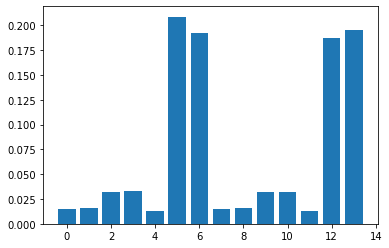

In [101]:
from matplotlib import pyplot as plt
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [102]:
precision = tp / (tp + fp)
precision

0.9471479213664196

In [103]:
# Calculate the sensitivity of the model based on the confusion matrix
sensitivity = tp / (tp + fn)
sensitivity

0.9570172582220775

In [ ]:
# f1 = 2*precision*sensitivity / (precision + sensitivity)
# f1

In [ ]:
# print(classification_report(y_true, y_pred))

In [ ]:
# # Plot the residuals for the training and testing data.

# ### BEGIN SOLUTION
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
# plt.title("Residual Plot")
# plt.show()
# ### END SOLUTION

In [107]:
# sharks then blues
X_prediction_test = pd.DataFrame([{0.186,0.923,31.0714,31.4286,49.6,0.083,0.895,0.207,0.708,29.0909,32.0909,51.4,0.072,0.878}])
X_prediction_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.186,0.923,0.083,0.895,0.207,0.708,32.0909,0.072,0.878,49.6,51.4,31.0714,29.0909,31.4286


In [108]:
prediction_test = classifier.predict(X_prediction_test)
pd.DataFrame({"Prediction": prediction_test})

c:\Users\josh.stowe\Anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Prediction
0,0


In [109]:
# islanders then coyotes
X_prediction_test = pd.DataFrame([{0.191,0.870,31.7857,33.0,49.4,0.110,0.922,0.293,0.804,23.4167,36.6667,45.5,0.125,0.895}])
X_prediction_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.191,0.87,33.0,0.11,0.922,0.293,0.804,36.6667,0.125,0.895,45.5,49.4,23.4167,31.7857


In [110]:
prediction_test = classifier.predict(X_prediction_test)
pd.DataFrame({"Prediction": prediction_test})

c:\Users\josh.stowe\Anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Prediction
0,0


In [6]:
# # Dependencies
# import requests
# from pprint import pprint
# # from config import api_key

# query_url = "https://statsapi.web.nhl.com/api/v1/teams/1/stats"


In [7]:
# # Request articles
# # home_team = requests.get(query_url).json()
# home_team


{'copyright': 'NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. © NHL 2022. All Rights Reserved.',
 'stats': [{'type': {'displayName': 'statsSingleSeason',
    'gameType': {'id': 'R',
     'description': 'Regular season',
     'postseason': False}},
   'splits': [{'stat': {'gamesPlayed': 10,
      'wins': 7,
      'losses': 3,
      'ot': 0,
      'pts': 14,
      'ptPctg': '70.0',
      'goalsPerGame': 3.6,
      'goalsAgainstPerGame': 2.5,
      'evGGARatio': 1.4706,
      'powerPlayPercentage': '22.2',
      'powerPlayGoals': 6.0,
      'powerPlayGoalsAgainst': 4.0,
      'powerPlayOpportunities': 27.0,
      'penaltyKillPercentage': '88.2',
      'shotsPerGame': 39.1,
      'shotsAllowed': 21.8,
      'winScoreFirst': 0.625,
      'winOppScoreFirst': 1.0,
      'winLeadFirstPer': 0.75,
      'winLeadSecondPer': 1.0,
      'winOutshootOpp': 0.667,
      'winOutshotByOpp': 1.0,
      'fac

In [16]:
# home_stats = home_team['stats']
# home_stats

[{'type': {'displayName': 'statsSingleSeason',
   'gameType': {'id': 'R',
    'description': 'Regular season',
    'postseason': False}},
  'splits': [{'stat': {'gamesPlayed': 10,
     'wins': 7,
     'losses': 3,
     'ot': 0,
     'pts': 14,
     'ptPctg': '70.0',
     'goalsPerGame': 3.6,
     'goalsAgainstPerGame': 2.5,
     'evGGARatio': 1.4706,
     'powerPlayPercentage': '22.2',
     'powerPlayGoals': 6.0,
     'powerPlayGoalsAgainst': 4.0,
     'powerPlayOpportunities': 27.0,
     'penaltyKillPercentage': '88.2',
     'shotsPerGame': 39.1,
     'shotsAllowed': 21.8,
     'winScoreFirst': 0.625,
     'winOppScoreFirst': 1.0,
     'winLeadFirstPer': 0.75,
     'winLeadSecondPer': 1.0,
     'winOutshootOpp': 0.667,
     'winOutshotByOpp': 1.0,
     'faceOffsTaken': 582.0,
     'faceOffsWon': 330.0,
     'faceOffsLost': 252.0,
     'faceOffWinPercentage': '56.7',
     'shootingPctg': 9.2,
     'savePctg': 0.885},
    'team': {'id': 1,
     'name': 'New Jersey Devils',
     'link': 

In [17]:
# home_splits = home_stats[0]['splits']
# home_splits

[{'stat': {'gamesPlayed': 10,
   'wins': 7,
   'losses': 3,
   'ot': 0,
   'pts': 14,
   'ptPctg': '70.0',
   'goalsPerGame': 3.6,
   'goalsAgainstPerGame': 2.5,
   'evGGARatio': 1.4706,
   'powerPlayPercentage': '22.2',
   'powerPlayGoals': 6.0,
   'powerPlayGoalsAgainst': 4.0,
   'powerPlayOpportunities': 27.0,
   'penaltyKillPercentage': '88.2',
   'shotsPerGame': 39.1,
   'shotsAllowed': 21.8,
   'winScoreFirst': 0.625,
   'winOppScoreFirst': 1.0,
   'winLeadFirstPer': 0.75,
   'winLeadSecondPer': 1.0,
   'winOutshootOpp': 0.667,
   'winOutshotByOpp': 1.0,
   'faceOffsTaken': 582.0,
   'faceOffsWon': 330.0,
   'faceOffsLost': 252.0,
   'faceOffWinPercentage': '56.7',
   'shootingPctg': 9.2,
   'savePctg': 0.885},
  'team': {'id': 1, 'name': 'New Jersey Devils', 'link': '/api/v1/teams/1'}}]

In [ ]:
# export model to h5


In [112]:
import requests

In [169]:
# home team
url = "https://statsapi.web.nhl.com/api/v1/teams/21/?expand=team.stats"
home = requests.get(url).json()


url = "https://statsapi.web.nhl.com/api/v1/teams/18/?expand=team.stats"
away = requests.get(url).json()


In [170]:
gamedata = []
id = home['teams'][0]['teamStats'][0]['splits'][0]['team']['id']
name = home['teams'][0]['teamStats'][0]['splits'][0]['team']['name']
gpg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
gapg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsAgainstPerGame']
pppctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['powerPlayPercentage']
pkpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['penaltyKillPercentage']
shots = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsPerGame']
shotsallowed = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsAllowed']
winoutshootopp = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshootOpp']
winoutshotbyopp = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshotByOpp']
faceoffpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['faceOffWinPercentage']
shootingpctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['shootingPctg']
savepctg = home['teams'][0]['teamStats'][0]['splits'][0]['stat']['savePctg']
gamedata.append({
    # "id" : id,
                  "name" : name,
                #  "gpg" : gpg,
                #  "gapg" : gapg,
                 "pppctg" : float(pppctg)/100,
                 "pkpctg" : float(pkpctg)/100,
                 "shots" : shots,
                 "shotsallowed" : shotsallowed,
                #  "winoutshootopp" : winoutshootopp,
                #  "winoutshotbyopp" : winoutshotbyopp,
                 "faceoffpctg" : faceoffpctg,
                 "shootingpctg" : float(shootingpctg)/100,
                 "savepctg" : savepctg})
home_df = pd.DataFrame(gamedata)

In [171]:
gamedata = []
id = away['teams'][0]['teamStats'][0]['splits'][0]['team']['id']
name = away['teams'][0]['teamStats'][0]['splits'][0]['team']['name']
gpg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
gapg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['goalsAgainstPerGame']
pppctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['powerPlayPercentage']
pkpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['penaltyKillPercentage']
shots = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsPerGame']
shotsallowed = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shotsAllowed']
winoutshootopp = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshootOpp']
winoutshotbyopp = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['winOutshotByOpp']
faceoffpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['faceOffWinPercentage']
shootingpctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['shootingPctg']
savepctg = away['teams'][0]['teamStats'][0]['splits'][0]['stat']['savePctg']
gamedata.append({
    # "awayid" : id,
                 "awayname" : name,
                #  "gpg" : gpg,
                #  "gapg" : gapg,
                 "awaypppctg" : float(pppctg)/100,
                 "awaypkpctg" : float(pkpctg)/100,
                 "awayshots" : shots,
                 "awayshotsallowed" : shotsallowed,
                #  "winoutshootopp" : winoutshootopp,
                #  "winoutshotbyopp" : winoutshotbyopp,
                 "awayfaceoffpctg" : faceoffpctg,
                 "awayshootingpctg" : float(shootingpctg)/100,
                 "awaysavepctg" : savepctg})
away_df = pd.DataFrame(gamedata)

In [172]:
test_df = pd.concat([home_df,away_df],axis=1)
test_df = test_df.drop(columns="name")
test_df = test_df.drop(columns="awayname")
prediction_test = classifier.predict(test_df)
pd.DataFrame({"Prediction": prediction_test})


c:\Users\josh.stowe\Anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- awayfaceoffpctg
- awaypkpctg
- awaypppctg
- awaysavepctg
- awayshootingpctg
- ...
Feature names seen at fit time, yet now missing:
- faceOffWinPercentage_away
- faceOffWinPercentage_home
- penaltyKillPrct_away
- penaltyKillPrct_home
- powerPlayPrct_away
- ...

  warnings.warn(message, FutureWarning)


,Prediction
0,1


In [173]:
home_df

,name,pppctg,pkpctg,shots,shotsallowed,faceoffpctg,shootingpctg,savepctg
0,Colorado Avalanche,0.382,0.707,32.9091,33.4545,45.8,0.108,0.916


In [174]:
away_df

,awayname,awaypppctg,awaypkpctg,awayshots,awayshotsallowed,awayfaceoffpctg,awayshootingpctg,awaysavepctg
0,Nashville Predators,0.143,0.83,29.8462,32.2308,53.9,0.088,0.895
